In [1]:
set scheme s1mono

In [2]:
import delimited "/Users/santerivaataja/Desktop/Taloustieteen_kursseja/Econometrics/Capstone.nosync/Econometrics-Capstone/raw_data/master.csv", clear bindquote(nobind)

(105 vars, 9,854 obs)


In [3]:
destring democracy, force generate(dem_int)
destring year, replace force


democracy: contains nonnumeric characters; dem_int generated as byte
(1294 missing values generated)

year: contains nonnumeric characters; replaced as int
(288 missing values generated)


In [4]:
sort country year
bysort country: gen dem_chg = dem_int - dem_int[_n - 1]



(1,474 missing values generated)


In [18]:
%browse 5 if dem_chg == 1

,country,year,pr,cl,status,ddregime,ddcategory,monarchy,commonwealth,monarchname,monarchaccession,monarchbirthyear,femalemonarch0no1yes,democracy,dem_int,presidential,presidentname,presidentaccesion,presidentbirthyear,interimphasemorethan2presidentsy,femalepresident0no1yes,colony,colonyof,colonyadministratedby,communist,regimechangelag,spatialdemocracy,countrycode,noofchambersinparliament,proportionalvoting,electionsystem,noofmembersinlowerhouse,noofmembersinupperhouse,noofmembersinthirdhouse,newconstitution,fullsuffrage,suffragerestriction,electoral,spatialelectoral,alternation,multiparty,freeandfairelection,parliamentaryelectionyear,electionmonth,v44,postponedelection,anticorruptionpolicy,civilrights,civilsocietyparticipation,civilsocietytraditions,cleavageconflictmanagement,commitmenttodemocraticinstitutio,conflictintensity,consensusongoals,antidemocraticactors,educationpolicyrd,effectivepowertogovern,effectiveuseofsupport,efficientuseofassets,environmentalpolicy,equalopportunity,freeandfairelections,freedomofexpression,independentjudiciary,interestgroups,internationalcooperation,monopolyontheuseofforce,nointerferenceofreligiousdogmas,associationassemblyrights,organizationofthemarketandcompet,partysystem,performanceofdemocraticinstituti,policycoordination,policylearning,politicalparticipation,politicalandsocialintegration,privateproperty,prosecutionofofficeabuse,regionalcooperation,resourceefficiency,separationofpowers,socialcapital,socialsafetynets,socioeconomicbarriers,stabilityofdemocraticinstitution,stateidentity,basicadministration,steeringcapability,structuralconstraints,welfareregime,approvalofdemocracy,gs,t,corruption,efficiency,stability,rol,acc,mortality,trade,gdp,outofschool,eurasia,continentcat,v104,v105,dem_chg
356,albania,1992,4,3,PF,0.0,Parliamentary democracy,0,0.0,.,.,.,.,1.0,1,0.0,Sali Berisha,1992,1944,0,0,0,.,.,0,0,"""0","6""",2,1,0.0,.,140.0,.,.,0,1.0,.,3.0,"""2","6""",1.0,1,1.0,1.0,March 1992,0.0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,Europe,3.0,.,1
361,albania,1997,4,4,PF,0.0,Parliamentary democracy,0,0.0,.,.,.,.,1.0,1,0.0,Rexhep Qemal Meidani,1997,1944,0,0,0,.,.,0,0,"""0","6""",2,1,0.0,Parallel SMD/PR,155.0,.,.,0,1.0,.,3.0,"""2","6""",1.0,1,1.0,1.0,June 1997,0.0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,Europe,3.0,.,1
578,argentina,1973,2,2,F,2.0,Presidential democracy,0,0.0,.,.,.,.,1.0,1,1.0,Hector Campara,1973,1909,1,0,0,.,.,0,1,0,7.0,2,1,List PR (large multi-member),243.0,69.0,.,0,1,.,3.0,"""0","8""",1.0,1.0,1,1.0,March 1973,0.0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,Americas,0.0,.,.,1
587,argentina,1983,3,3,PF,2.0,Presidential democracy,0,0.0,.,.,.,.,1.0,1,1.0,Reynaldo Bignone,1982,1928,0,0,0,.,.,0,1,"""0","2""",7,2,.,.,.,.,.,1,1.0,.,3.0,"""1","4""",1.0,1,1.0,0.0,.,0.0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,Americas,0.0,.,1
648,armenia,1996,5,4,PF,1.0,Mixed democratic,0,0.0,.,.,.,.,1.0,1,1.0,Levon Ter-Petrosyan,1991,1945,0,0,0,.,.,0,0,"""0","25""",8,1,1.0,Parallel SMD/PR,190.0,.,.,0,1.0,.,3.0,"""2","25""",1.0,1,1.0,1.0,July 1995,0.0,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,.,Eurasia,2.0,.,1


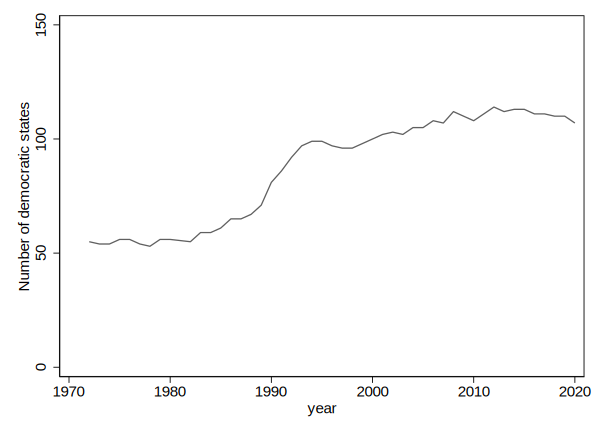

In [6]:
qui {
    preserve
    collapse (sum) dem_int, by(year)
    line dem_int year if year >= 1970, ysc(r(50 150)) ytitle("Number of democratic states") //ylabel(50(10)150)
    graph export "saved_outputs/n_dem.pdf", replace
    restore
}

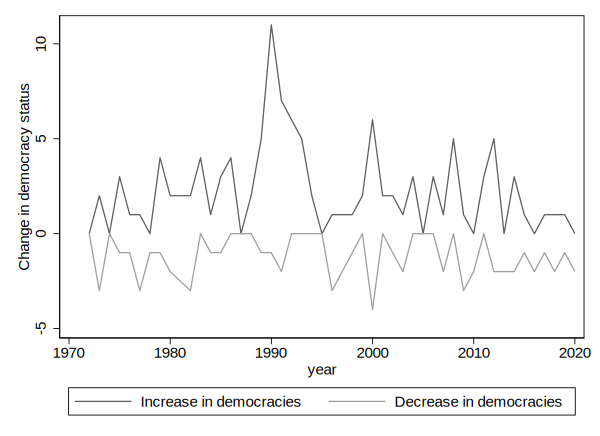

In [5]:
qui {
    preserve
    egen new_dem = group(year dem_chg) if dem_chg == 1, label
    egen not_dem = group(year dem_chg) if dem_chg == -1, label
    collapse (count) new_dem (count) not_dem, by(year)
    replace not_dem = -not_dem
    twoway line new_dem year if year >= 1970 || /// 
        line not_dem year if year >= 1970, ///
        ytitle("Change in democracy status") ///
        legend(label(1 "Increase in democracies") label(2 "Decrease in democracies"))
    graph export "saved_outputs/change_in_dem.pdf", replace
    restore
}